# NetWorkX 代码实战 - 创建图

## 1 创建图

In [1]:
import networkx as nx
nx.__version__

'2.6.3'

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("font",family="SimHei")
plt.rcParams["axes.unicode_minus"]=False

# Specify Chinese font
zhfont1 = mpl.font_manager.FontProperties(fname='C:\Windows\Fonts\simsun.ttc')
 
# Force Matplotlib to recognize SimHei or other Chinese font
mpl.rcParams['font.sans-serif'] = [zhfont1.get_name()]

### 1.1 内置图

#### 1.1.1 经典图结构

全图连接数：21


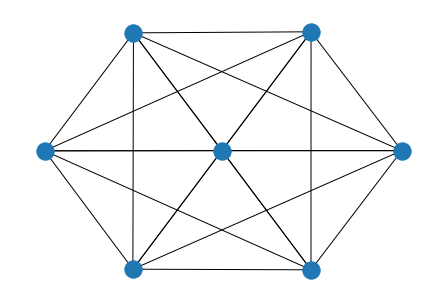

In [3]:
# 全连接无向图
G = nx.complete_graph(7)
print("全图连接数：%d"%G.size())
nx.draw(G)

是否为有向图:True


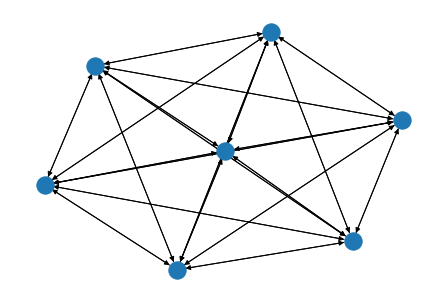

In [4]:
# 全连接有向图
G = nx.complete_graph(7,nx.DiGraph())
print("是否为有向图:%s"%G.is_directed())
nx.draw(G)

Text(0.5, 1.0, '二项树')

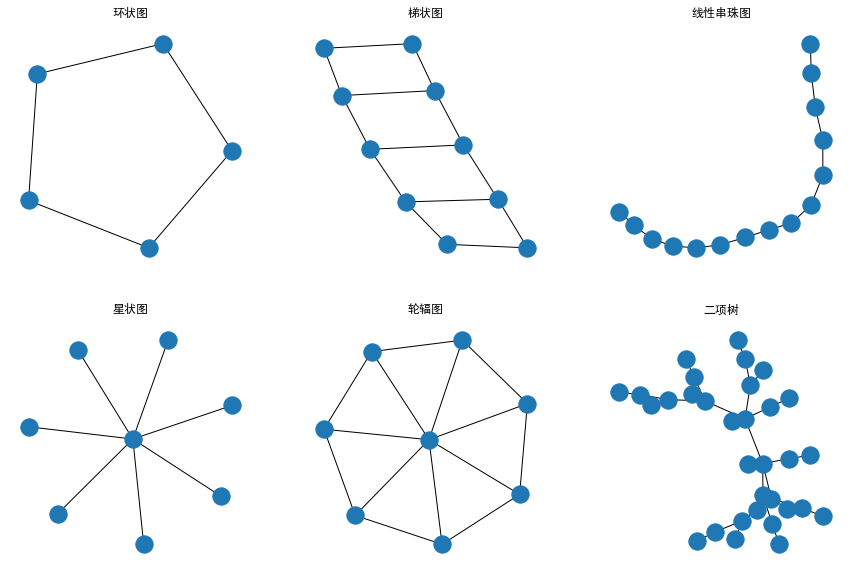

In [5]:
fig,ax = plt.subplots(2,3,figsize = (15,10))
# 环状图
G = nx.cycle_graph(5)
nx.draw(G,ax=ax[0][0])
ax[0][0].set_title("环状图")
# 梯状图
G = nx.ladder_graph(5)
nx.draw(G,ax=ax[0][1])
ax[0][1].set_title("梯状图")
# 线性串珠图
G = nx.path_graph(15)
nx.draw(G,ax=ax[0][2])
ax[0][2].set_title("线性串珠图")
# 星状图
G = nx.star_graph(7)
nx.draw(G,ax=ax[1][0])
ax[1][0].set_title("星状图")
# 轮辐图
G = nx.wheel_graph(8)
nx.draw(G,ax=ax[1][1])
ax[1][1].set_title("轮辐图")
# 二项树
G = nx.binomial_tree(5)
nx.draw(G,ax=ax[1][2])
ax[1][2].set_title("二项树")

#### 1.1.2 栅格图

(0.0, 1.0, 0.0, 1.0)

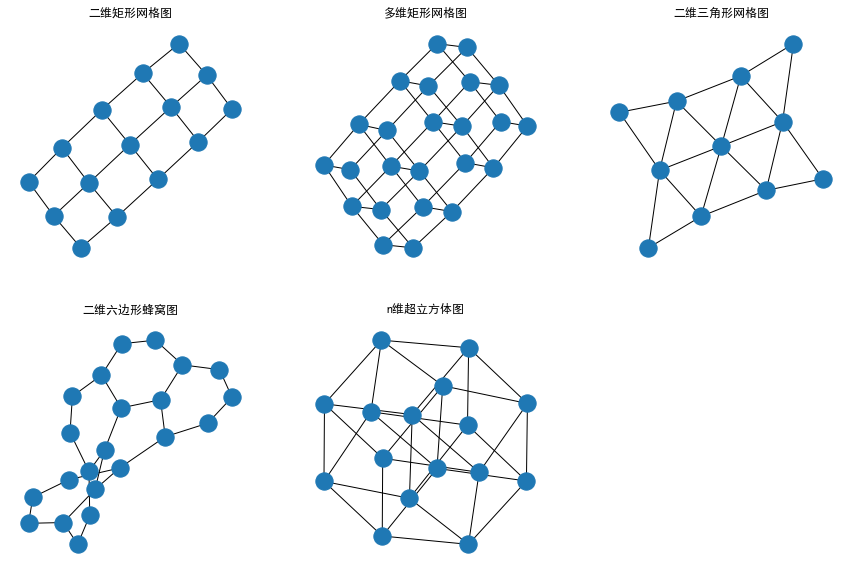

In [6]:
fig,ax = plt.subplots(2,3,figsize = (15,10))
# 二维矩形网格图
G = nx.grid_2d_graph(3,5)
nx.draw(G,ax=ax[0][0])
ax[0][0].set_title("二维矩形网格图")
# 多维矩形网格图
G = nx.grid_graph(dim=(2,3,4))
nx.draw(G,ax=ax[0][1])
ax[0][1].set_title("多维矩形网格图")
# 二维三角形网格图
G = nx.triangular_lattice_graph(2,5)
nx.draw(G,ax=ax[0][2])
ax[0][2].set_title("二维三角形网格图")
# 二维六边形蜂窝图
G = nx.hexagonal_lattice_graph(2,3)
nx.draw(G,ax=ax[1][0])
ax[1][0].set_title("二维六边形蜂窝图")
# n维超立方体图
G = nx.hypercube_graph(4)
nx.draw(G,ax=ax[1][1])
ax[1][1].set_title("n维超立方体图")
# 
ax[1][2].axis("off")

#### 1.1.3 NetworkX内置图

Text(0.5, 1.0, '风筝图')

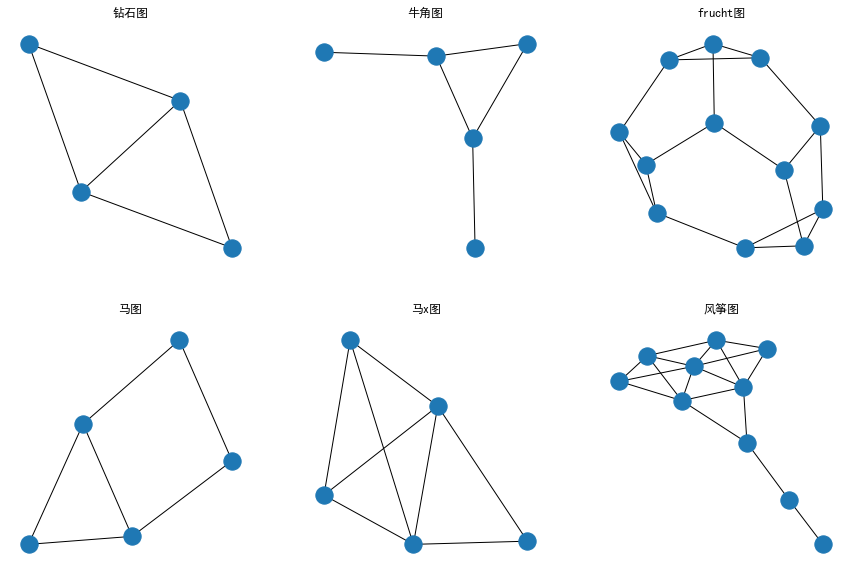

In [7]:
fig,ax = plt.subplots(2,3,figsize = (15,10))
# 钻石图
G = nx.diamond_graph()
nx.draw(G,ax=ax[0][0])
ax[0][0].set_title("钻石图")
# 牛角图
G = nx.bull_graph()
nx.draw(G,ax=ax[0][1])
ax[0][1].set_title("牛角图")
# frucht图
G = nx.frucht_graph()
nx.draw(G,ax=ax[0][2])
ax[0][2].set_title("frucht图")
# 马图
G = nx.house_graph()
nx.draw(G,ax=ax[1][0])
ax[1][0].set_title("马图")
# 马x图
G = nx.house_x_graph()
nx.draw(G,ax=ax[1][1])
ax[1][1].set_title("马x图")
# 风筝图
G = nx.krackhardt_kite_graph()
nx.draw(G,ax=ax[1][2])
ax[1][2].set_title("风筝图")

#### 1.1.4 内置有向图

##### 无标度有向图

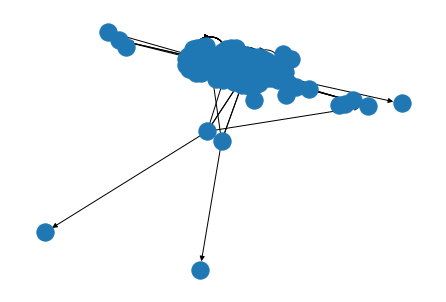

In [9]:
G = nx.scale_free_graph(100)
nx.draw(G)

##### 社交网络     
有一些经典数据集：
1. 空手道俱乐部数据集(图机器学习的鸢尾花)
2. 雨果《悲惨世界》人际关系
3. 家庭关系

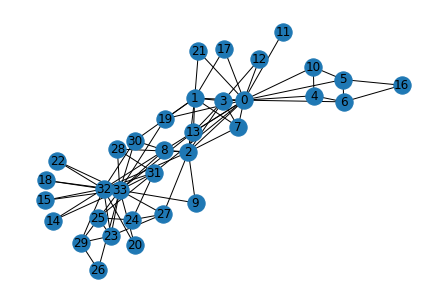

In [10]:
# 空手道俱乐部数据集(图机器学习的鸢尾花)
G = nx.karate_club_graph()
nx.draw(G, with_labels = True)

In [11]:
G.nodes[5]["club"]

'Mr. Hi'

In [12]:
G.nodes[9]["club"]

'Officer'

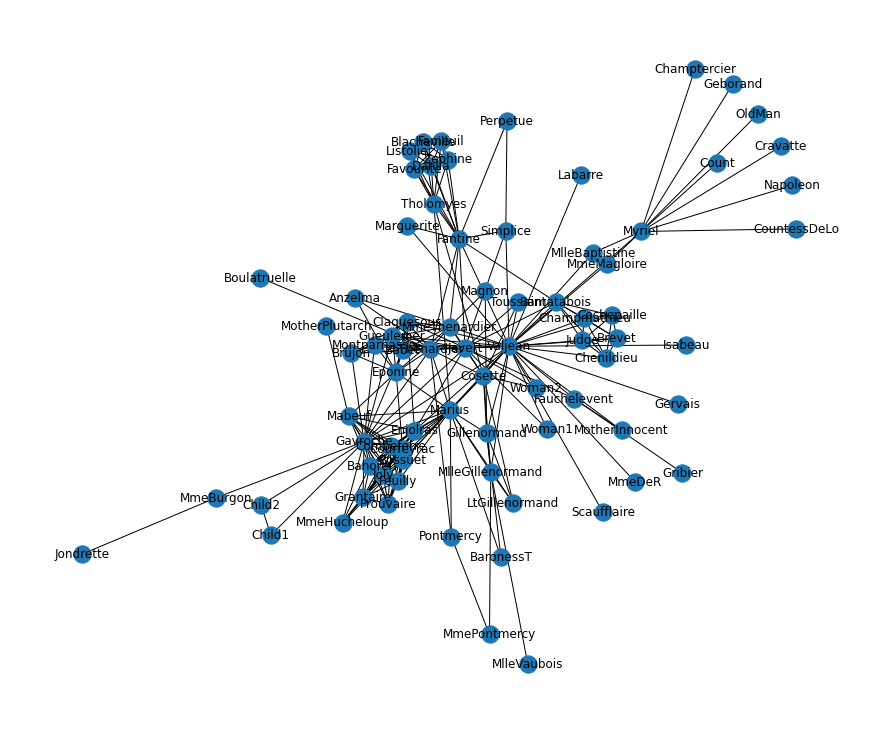

In [14]:
# 空手道俱乐部数据集(图机器学习的鸢尾花)
G = nx.les_miserables_graph()
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G,seed=10) #生成一个布局
nx.draw(G, pos, with_labels = True)

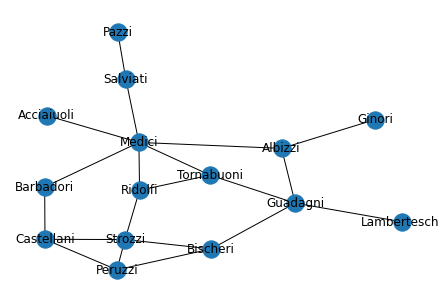

In [15]:
# 家庭关系
G = nx.florentine_families_graph()
nx.draw(G,with_labels=True)

#### 1.1.5 社群聚类图

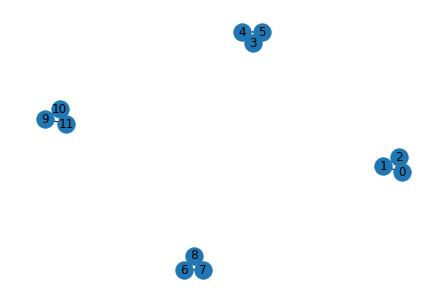

In [17]:
G = nx.caveman_graph(4,3) #4个集群，每个群3个
nx.draw(G,with_labels=True)

#### 1.1.6 树

In [18]:
tree = nx.random_tree(n=10,seed=0)
print(nx.forest_str(tree,sources=[0]))

╙── 0
    ├── 3
    └── 4
        ├── 6
        │   ├── 1
        │   ├── 2
        │   └── 7
        │       └── 8
        │           └── 5
        └── 9


### 1.2 创建自己的图

#### 1.2 1 通过连接表和邻接表创建图

In [21]:
import pandas as pd

下载数据集
[http://www.openkg.cn/dataset/ch4masterpieces](http://www.openkg.cn/dataset/ch4masterpieces)

##### 导入三元组连接表

In [24]:
df = pd.read_csv('data/三国演义/triples.csv')
df.head()

,head,tail,relation,label
0,关羽,刘备,younger_sworn_brother,义弟
1,张飞,刘备,younger_sworn_brother,义弟
2,关羽,张飞,elder_sworn_brother,义兄
3,张苞,张飞,son,儿子
4,关兴,关羽,son,儿子


##### 通过连接表Edge List创建图

In [28]:
G = nx.DiGraph()
edges = [edge for edge in zip(df['head'],df['tail'])]
G.add_edges_from(edges)

In [29]:
G.edges("关羽")

OutEdgeDataView([('关羽', '刘备'), ('关羽', '张飞')])

##### 可视化

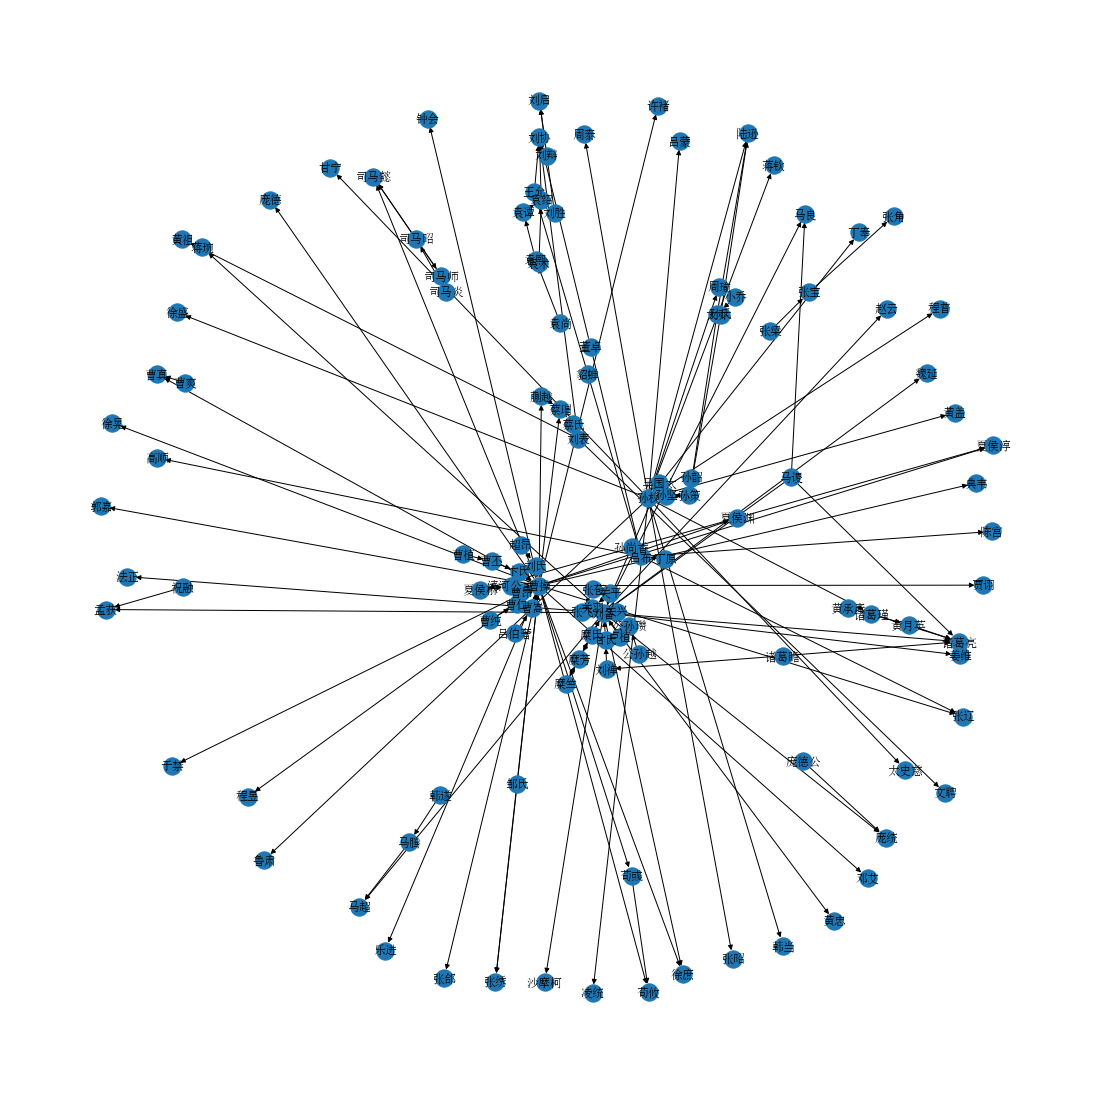

In [37]:
pos = nx.spring_layout(G,seed=123)

plt.figure(figsize=(15,15))
nx.draw(G, pos = pos, with_labels = True)

##### 查看全图参数

In [39]:
print(G)
print(len(G))
print(G.size())
print(G.nodes)

DiGraph with 123 nodes and 144 edges
123
144
['关羽', '刘备', '张飞', '张苞', '关兴', '关平', '卢植', '公孙瓒', '甘氏', '刘禅', '诸葛瞻', '诸葛亮', '姜维', '黄月英', '黄承彦', '诸葛瑾', '公孙越', '马超', '马腾', '韩遂', '徐庶', '曹操', '刘胜', '刘启', '刘辩', '孙权', '孙尚香', '糜氏', '糜芳', '糜竺', '魏延', '赵云', '黄忠', '庞统', '法正', '蒋琬', '马良', '孟获', '沙摩柯', '庞德公', '马谡', '祝融', '孙韶', '孙策', '孙氏', '陆逊', '刘协', '董卓', '王允', '貂蝉', '吕布', '丁原', '高顺', '陈宫', '张辽', '刘表', '蔡氏', '蔡瑁', '蒯越', '黄祖', '文聘', '张宝', '张角', '张梁', '袁绍', '袁术', '袁谭', '袁熙', '袁尚', '吴国太', '孙坚', '大乔', '小乔', '周瑜', '丁奉', '徐盛', '鲁肃', '张昭', '蒋钦', '太史慈', '周泰', '凌统', '吕蒙', '甘宁', '黄盖', '韩当', '程普', '曹嵩', '吕伯奢', '邹氏', '张绣', '清河公主', '夏侯楙', '夏侯渊', '夏侯淳', '曹真', '曹爽', '郭嘉', '徐晃', '乐进', '张郃', '许褚', '典韦', '荀彧', '荀攸', '贾诩', '司马懿', '程昱', '于禁', '邓艾', '钟会', '庞德', '司马师', '司马昭', '司马炎', '曹仁', '曹纯', '曹昂', '刘氏', '超昂', '卞氏', '曹丕', '曹植']


##### 保存并载入邻接表Adjacency List

In [41]:
for line in nx.generate_adjlist(G):
    print(line)

关羽 刘备 张飞
刘备 诸葛亮 马超 徐庶 姜维 糜芳 糜竺 魏延 赵云 黄忠 庞统 法正 蒋琬 马良 孟获 沙摩柯
张飞 刘备
张苞 张飞
关兴 关羽
关平 张苞 关羽
卢植 刘备
公孙瓒 刘备
甘氏 刘备
刘禅 甘氏
诸葛瞻 刘禅 诸葛亮
诸葛亮 姜维
姜维 诸葛亮
黄月英 诸葛亮
黄承彦 黄月英
诸葛瑾 诸葛亮
公孙越 公孙瓒
马超
马腾 马超
韩遂 马腾
徐庶
曹操 徐庶 张辽 蒯越 蔡瑁 张绣 夏侯淳 夏侯渊 曹真 郭嘉 徐晃 乐进 张郃 许褚 典韦 荀彧 荀攸 贾诩 司马懿 程昱 于禁 邓艾 钟会 庞德
刘胜 刘启
刘启
刘辩 刘启
孙权 诸葛瑾 孙策 周瑜 陆逊 丁奉 徐盛 鲁肃 张昭 蒋钦 太史慈 周泰 凌统 吕蒙 甘宁 黄盖 韩当 程普
孙尚香 刘备 吴国太
糜氏 刘备
糜芳 糜氏
糜竺 糜芳
魏延
赵云
黄忠
庞统
法正
蒋琬
马良
孟获
沙摩柯
庞德公 庞统
马谡 马良 诸葛亮 刘备
祝融 孟获
孙韶 孙策
孙策 孙坚
孙氏 陆逊 孙策
陆逊
刘协 刘辩
董卓 刘协 吕布
王允 刘协
貂蝉 王允 吕布
吕布 高顺 陈宫 张辽
丁原 吕布
高顺
陈宫
张辽
刘表 刘协 黄祖 文聘
蔡氏 刘表
蔡瑁 蔡氏
蒯越 蔡瑁
黄祖
文聘
张宝 张角
张角
张梁 张宝
袁绍 刘协
袁术 袁绍
袁谭 袁绍
袁熙 袁谭
袁尚 袁熙
吴国太 孙坚 孙权
孙坚 孙权
大乔 孙策 陆逊
小乔 大乔
周瑜 小乔
丁奉
徐盛
鲁肃
张昭
蒋钦
太史慈
周泰
凌统
吕蒙
甘宁
黄盖
韩当
程普
曹嵩 曹操
吕伯奢 曹嵩
邹氏 曹操 张绣
张绣
清河公主 曹操
夏侯楙 清河公主
夏侯渊 夏侯楙 夏侯淳
夏侯淳
曹真
曹爽 曹真
郭嘉
徐晃
乐进
张郃
许褚
典韦
荀彧 荀攸
荀攸
贾诩
司马懿
程昱
于禁
邓艾
钟会
庞德
司马师 司马懿
司马昭 司马师 司马懿
司马炎 司马昭
曹仁 曹操
曹纯 曹仁
曹昂 曹操
刘氏 曹操
超昂 刘氏
卞氏 曹操
曹丕 卞氏
曹植 曹丕


In [43]:
# 保存到grid.edgelist里头
nx.write_edgelist(G,path="data/grid.edgelist",delimiter=":")

##### 读取重建

In [44]:
# 读取grid.edgelist
H= nx.read_edgelist(path="data/grid.edgelist",delimiter=":")

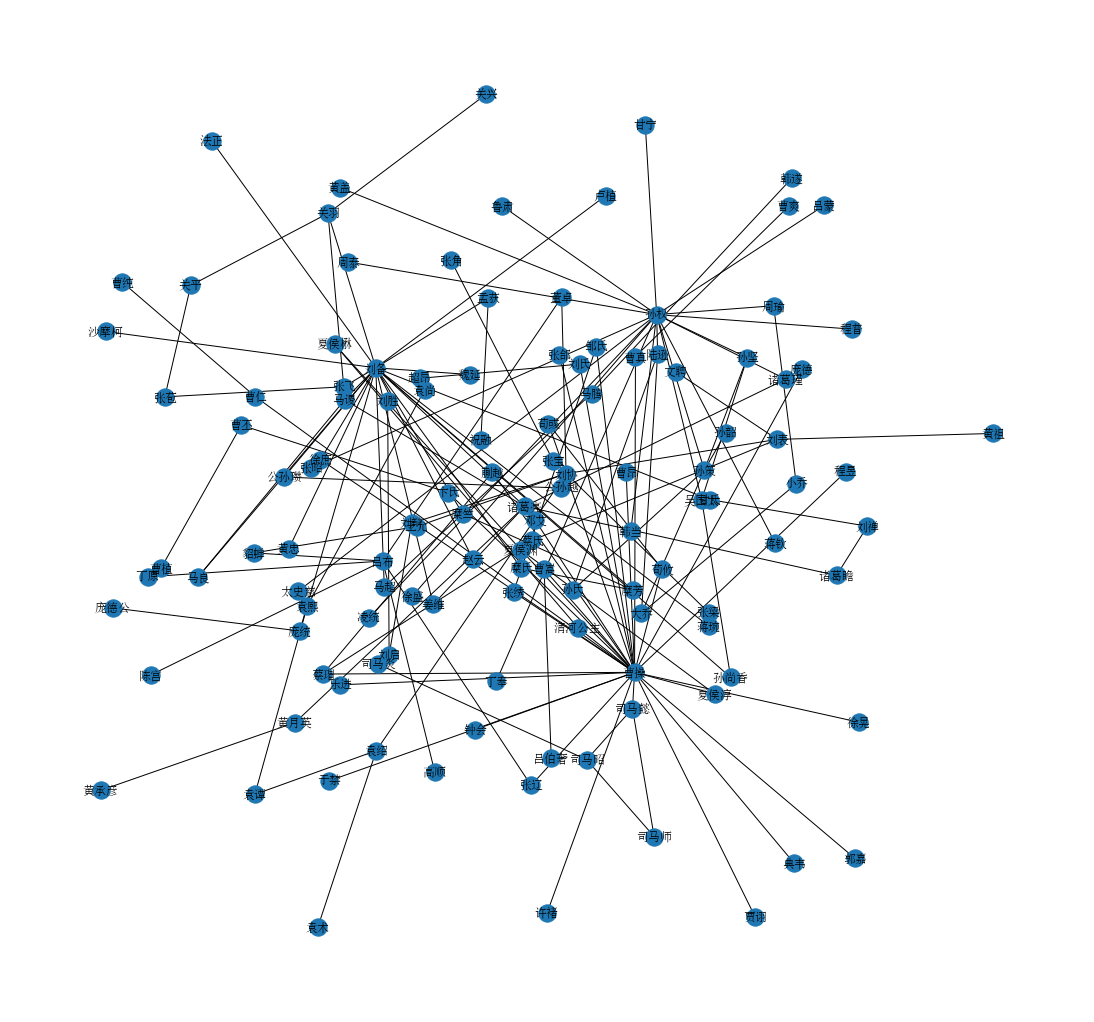

In [45]:
# 可视化
plt.figure(figsize=(15,14))
pos = nx.spring_layout(H,iterations=3, seed=5)

nx.draw(H, pos = pos, with_labels = True)

#### 1.2.2 从零创建图